In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
clean_loans = loans.copy()

In [5]:
clean_loans.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [6]:
clean_loans= clean_loans[['LoanStatus','LoanOriginalAmount', 'Term','BorrowerAPR',
             'CreditScoreRangeLower']]

In [7]:
clean_loans = clean_loans.dropna()
clean_loans.head()

,LoanStatus,LoanOriginalAmount,Term,BorrowerAPR,CreditScoreRangeLower
0,Completed,9425,36,0.16516,640.0
1,Current,10000,36,0.12016,680.0
2,Completed,3001,36,0.28269,480.0
3,Current,10000,36,0.12528,800.0
4,Current,15000,36,0.24614,680.0


In [8]:
clean_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113346 entries, 0 to 113936
Data columns (total 5 columns):
LoanStatus               113346 non-null object
LoanOriginalAmount       113346 non-null int64
Term                     113346 non-null int64
BorrowerAPR              113346 non-null float64
CreditScoreRangeLower    113346 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 5.2+ MB


In [9]:
clean_loans.LoanOriginalAmount.min(),clean_loans.LoanOriginalAmount.max()

(1000, 35000)

In [10]:
clean_loans.LoanOriginalAmount.value_counts().sort_index()

1000     3158
1001        7
1005        2
1010        1
1025       31
         ... 
34000       5
34679       1
34700       1
34999       3
35000     430
Name: LoanOriginalAmount, Length: 2460, dtype: int64

In [11]:
clean_loans.Term.min(),clean_loans.Term.max()

(12, 60)

In [12]:
clean_loans.Term.value_counts().sort_index()

12     1614
36    87187
60    24545
Name: Term, dtype: int64

In [13]:
clean_loans.BorrowerAPR.min(),clean_loans.BorrowerAPR.max()

(0.006529999999999999, 0.42395)

In [14]:
clean_loans.BorrowerAPR.value_counts().sort_index() 

0.00653     2
0.00864     1
0.01315     2
0.01325     1
0.01548     1
           ..
0.40482     1
0.40679    11
0.40745     4
0.41355    55
0.42395     1
Name: BorrowerAPR, Length: 6635, dtype: int64

In [15]:
#It is possible to have a near zero percent APR when a bank is financing loans for third-parties. The best
# expample of these situations is in the instance of Auto Loans, financed at extremely low rates to incentivize a purchase.

In [16]:
clean_loans.CreditScoreRangeLower.min(),clean_loans.CreditScoreRangeLower.max()

(0.0, 880.0)

In [17]:
clean_loans.CreditScoreRangeLower.value_counts().sort_index()

0.0        133
360.0        1
420.0        5
440.0       36
460.0      141
480.0      346
500.0      554
520.0     1593
540.0     1474
560.0     1357
580.0     1125
600.0     3602
620.0     4172
640.0    12199
660.0    16366
680.0    16492
700.0    15471
720.0    12923
740.0     9267
760.0     6606
780.0     4624
800.0     2644
820.0     1409
840.0      567
860.0      212
880.0       27
Name: CreditScoreRangeLower, dtype: int64

In [18]:
clean_loans = clean_loans.query('CreditScoreRangeLower > 0')

In [19]:
clean_loans.CreditScoreRangeLower.value_counts().sort_index()

360.0        1
420.0        5
440.0       36
460.0      141
480.0      346
500.0      554
520.0     1593
540.0     1474
560.0     1357
580.0     1125
600.0     3602
620.0     4172
640.0    12199
660.0    16366
680.0    16492
700.0    15471
720.0    12923
740.0     9267
760.0     6606
780.0     4624
800.0     2644
820.0     1409
840.0      567
860.0      212
880.0       27
Name: CreditScoreRangeLower, dtype: int64

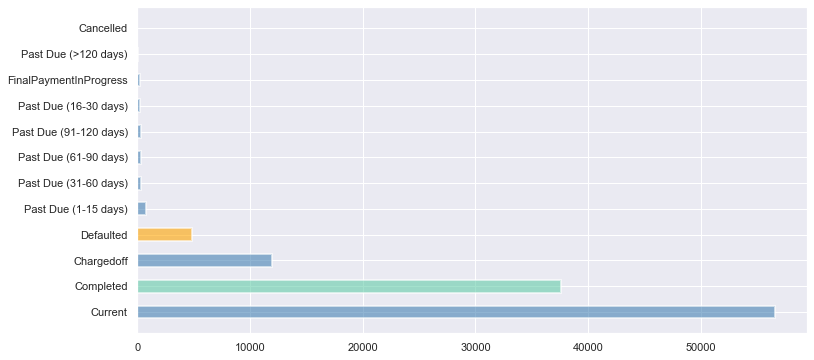

In [20]:
keys = clean_loans['LoanStatus'].value_counts().keys()
values = clean_loans['LoanStatus'].value_counts().values
ht = 0.5
sb = 'steelblue'
ma = 'mediumaquamarine'

y_bar = np.arange(len(keys))
fig, ax = plt.subplots(figsize=(12,6))
ax.barh(keys, values, alpha=0.6, edgecolor='white',linewidth=2, height= ht, 
        color=[sb,ma,sb,'orange',sb,sb,sb,sb,sb,sb,sb,sb])

plt.show()

In [21]:
badloans = clean_loans.query("LoanStatus == 'Defaulted'")
badloans= badloans.drop(columns={'LoanStatus'})
weights_df=np.ones(len(badloans)) / len(badloans)
weights_cl=np.ones(len(clean_loans)) / len(clean_loans)

badloans.sample(5)

,LoanOriginalAmount,Term,BorrowerAPR,CreditScoreRangeLower
96562,6500,36,0.20172,660.0
6247,1603,36,0.21150,460.0
78645,8950,36,0.26526,700.0
42905,7500,36,0.27205,640.0
17061,7000,36,0.22362,680.0


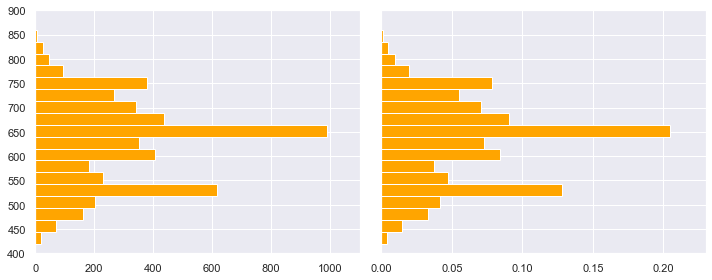

In [22]:
fig, ax = plt.subplots(1,2, figsize=(10,4),sharey=True)

ax[0].hist(badloans['CreditScoreRangeLower'],bins=18, color='orange', orientation='horizontal')
ax[0].set_ylim(400, 900)
ax[0].set_yticks(np.arange(400, 900+1,50))
ax[0].set_xlim(0, 1100)

ax[1].hist(badloans['CreditScoreRangeLower'],bins=18, weights=weights_df, orientation='horizontal', color='orange')
ax[1].set_xlim(0, 0.23)
ax[1].set_xticks(np.arange(0, 0.23,0.05))
ax[1].set_yticks(np.arange(400, 900+1, 50))
plt.tight_layout();

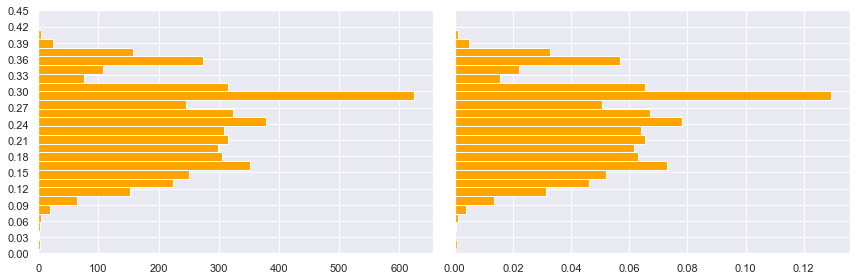

In [23]:
fig, ax = plt.subplots(1,2, figsize=(12,4),sharey=True)
ax[0].hist(badloans['BorrowerAPR'],bins=25, orientation='horizontal', color='orange')
ax[0].set_ylim(0, .45)
ax[0].set_yticks(np.arange(0, 0.45, step=.03))
                 
ax[1].hist(badloans['BorrowerAPR'],bins=25,density=False,weights=weights_df,color='orange', orientation='horizontal')
ax[1].set_ylim(0, .45)
ax[1].set_yticks(np.arange(0, 0.45, step=.03))
plt.tight_layout();

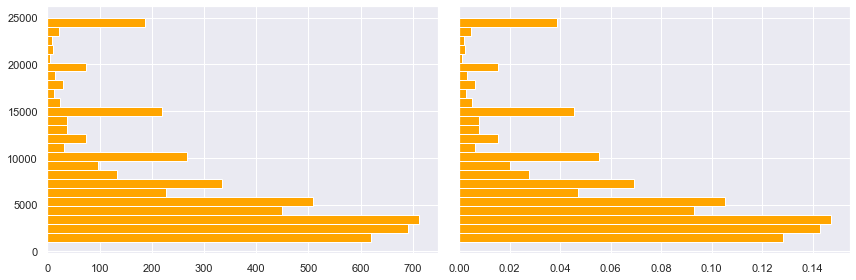

In [24]:
fig, ax = plt.subplots(1,2, figsize=(12,4),sharey=True)

ax[0].hist(badloans['LoanOriginalAmount'],bins=25, orientation='horizontal', color='orange');

ax[1].hist(badloans['LoanOriginalAmount'],bins=25, weights=weights_df, color='orange', orientation='horizontal');
plt.tight_layout()

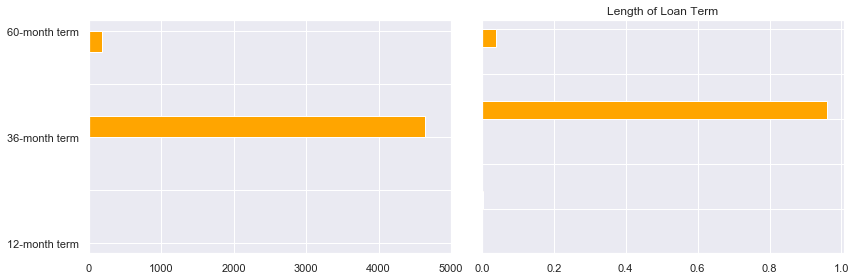

In [25]:
fig, ax = plt.subplots(1,2, figsize=(12,4),sharey=True)

ax[0].hist(badloans['Term'], orientation='horizontal', color='orange')
ax[0].set_xlim([0,5000])
ax[0].set_yticks(np.arange(0,60+2,12))
ax[0].set_yticklabels(['','12-month term','','36-month term','','60-month term']); 

ax[1].hist(badloans['Term'], weights=weights_df, color='orange', orientation='horizontal')
ax[1].set_yticks(np.arange(0,60+2,12))
ax[1].set_yticklabels(['','12-month term','','36-month term','','60-month term']); 

plt.title('Length of Loan Term')
plt.tight_layout();


C:\Users\tssan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


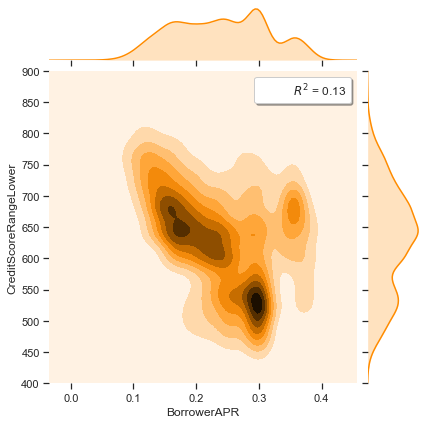

In [26]:
#Create a joint plot for BorrowerAPR and CreditScore
sns.set_style('ticks')
j = sns.jointplot(x='BorrowerAPR',y='CreditScoreRangeLower',data=badloans,
              kind='kde', shade=True, color='darkorange')
sns.despine(left=True, bottom=True)
plt.ylim(400,900)
plt.yticks(np.arange(400,900+1,50))
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
j = j.annotate(rsquare, template="{stat} = {val:.2f}",
stat="$R^2$",loc="upper right", fontsize=12, shadow=True)
plt.show();

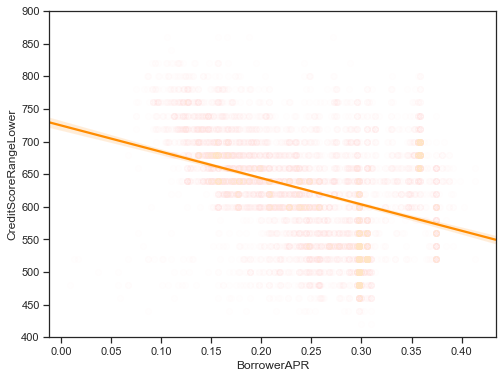

In [27]:
fig = plt.figure(figsize=(8,6))
sns.regplot(x=badloans['BorrowerAPR'],y=badloans['CreditScoreRangeLower'], scatter_kws={'color':'bisque','alpha':0.009},
           line_kws={'color':'darkorange'})
plt.ylim(400,900)
plt.yticks(np.arange(400,900+1,50))
plt.title('',size=14);

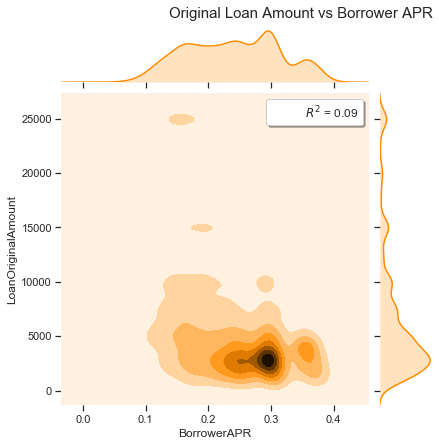

In [28]:
j = sns.jointplot(x='BorrowerAPR',y='LoanOriginalAmount',data=badloans,
              kind='kde', shade=True, color='darkorange')
sns.despine(left=True, bottom=True)
plt.title('Original Loan Amount vs Borrower APR',loc='right', pad=75,size=15)

j = j.annotate(rsquare, template="{stat} = {val:.2f}",
stat="$R^2$",loc="upper right", fontsize=12,shadow=True);

''

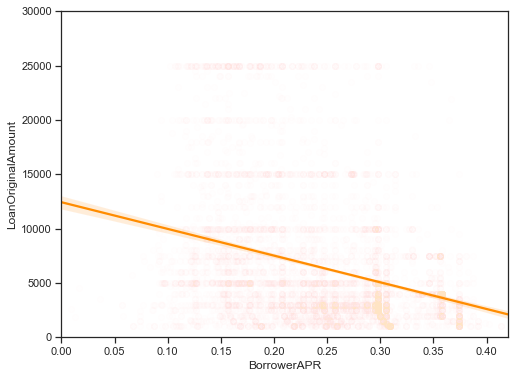

In [29]:
sns.set_style('ticks')
fig = plt.figure(figsize=(8,6))
sns.regplot(x=badloans['BorrowerAPR'],y=badloans['LoanOriginalAmount'], scatter_kws={'color':'bisque','alpha':0.009},
            line_kws={'color':'darkorange'})

plt.xlim(0,.42)
plt.ylim(0,30000)
plt.yticks(np.arange(0,30000+1, 5000))
;

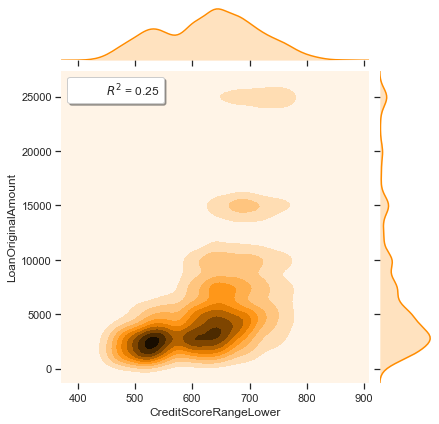

In [30]:

j= sns.jointplot(x='CreditScoreRangeLower',y='LoanOriginalAmount',data=badloans,
              kind='kde',shade=True, color='darkorange')
sns.despine(left=True, bottom=True)
j = j.annotate(rsquare, template="{stat} = {val:.2f}",
stat="$R^2$",loc="upper left", fontsize=12, shadow=True)
plt.show();

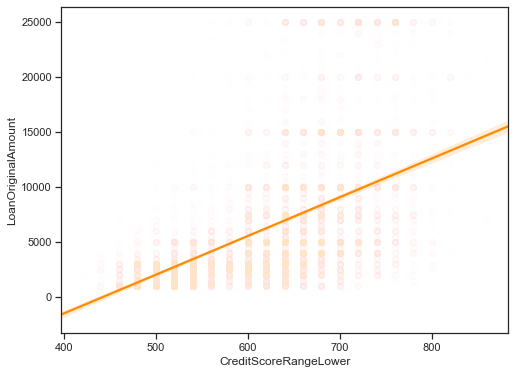

In [31]:
sns.set_style('ticks')
fig = plt.figure(figsize=(8,6))
sns.regplot(x=badloans['CreditScoreRangeLower'],y=badloans['LoanOriginalAmount'], scatter_kws={'color':'bisque','alpha':0.009},
           line_kws={'color':'darkorange'});

In [32]:
complete_loans = clean_loans.query("LoanStatus == 'Completed'")

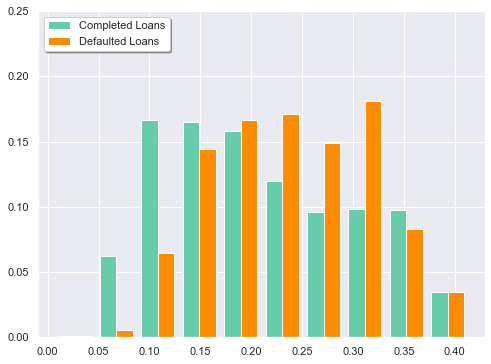

In [33]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(8,6))
weights_df=np.ones(len(badloans)) / len(badloans)
weights_cl=np.ones(len(complete_loans)) / len(complete_loans)


x = complete_loans['BorrowerAPR']
y = badloans['BorrowerAPR']
plt.hist([x, y], label=['Completed Loans','Defaulted Loans'], bins=10 ,weights=[weights_cl,weights_df],
         color=['mediumaquamarine','darkorange'])
plt.ylim(0,.25)
plt.legend(loc='upper left',facecolor='white',shadow=True);

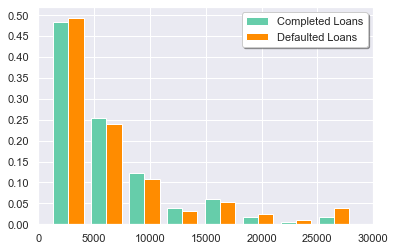

In [34]:
x = complete_loans['LoanOriginalAmount']
y = badloans['LoanOriginalAmount']

plt.hist([x, y], label=['Completed Loans','Defaulted Loans'], bins=10, weights=[weights_cl,weights_df],
         color=['mediumaquamarine','darkorange'])
plt.xlim(0,30000)
plt.ylim(0,.52)
plt.yticks(np.arange(0,.5+.01,.05))
plt.legend(loc='upper right',facecolor='white',shadow=True);

In [35]:
badloans['Term'].value_counts()

36    4637
60     186
12      10
Name: Term, dtype: int64

In [36]:
cl_kys = complete_loans['Term'].value_counts().keys()
cl_vl = complete_loans['Term'].value_counts().values
clean_loans['Term'].value_counts()

36    87054
60    24545
12     1614
Name: Term, dtype: int64

In [37]:
bad_kys = badloans['Term'].value_counts().keys()
bad_vl = badloans['Term'].value_counts().values
badloans['Term'].value_counts()

36    4637
60     186
12      10
Name: Term, dtype: int64

In [38]:
cl_percentage = []
for i in range(len(cl_vl)):
    perc = cl_vl[i]/cl_vl.sum()
    perc = round(perc,2)
    cl_percentage.append(perc)
    term = cl_kys[i]
    print(term, perc)

36 0.9
60 0.06
12 0.04


In [39]:
bad_percentage = []
for i in range(len(bad_vl)):
    perc = bad_vl[i]/bad_vl.sum()
    perc = round(perc,2)
    bad_percentage.append(perc)
    term = bad_kys[i]
    print(term, perc)

36 0.96
60 0.04
12 0.0


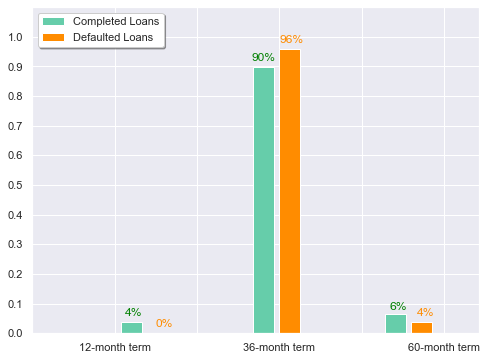

In [40]:
size=12
x = complete_loans['Term']
y = badloans['Term']
fig = plt.figure(figsize=(8,6))
plt.hist([x, y], label=['Completed Loans','Defaulted Loans'],  bins=5, weights=[weights_cl,weights_df],
        color=['mediumaquamarine','darkorange'],width=3)
plt.xlim(0,65)
plt.xticks(np.arange(0,60+2,12),labels=['','12-month term','','36-month term','','60-month term'])
plt.ylim(0,1.1)
plt.yticks(np.arange(0,1+.1,0.1))

plt.legend(loc='upper left',facecolor='white',shadow=True)

#All Loan percentages
plt.text(s='4%', x=13.5, y=0.06, size=size,color='green')
plt.text(s='90%',x=32,y=.92, size=size,color='green')
plt.text(s='6%',x=52,y=.08, size=size,color='green')

#Default loan percentages
plt.text(s='0%', x=18, y=0.02, size=size,color='darkorange')
plt.text(s='96%',x=36,y=.98, size=size,color='darkorange')
plt.text(s='4%',x=56,y=.06, size=size,color='darkorange');

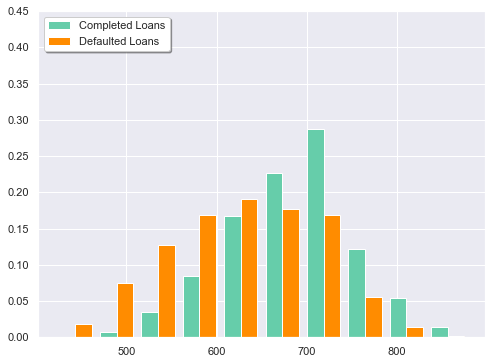

In [41]:
x = complete_loans['CreditScoreRangeLower']
y = badloans['CreditScoreRangeLower']

fig = plt.figure(figsize=(8,6))
plt.hist([x, y], label=['Completed Loans', 'Defaulted Loans'], bins=10, weights=[weights_cl,weights_df],
        color=['mediumaquamarine','darkorange'])
plt.ylim(0,.45)
plt.yticks(np.arange(0,.45+.01,.05))
plt.legend(loc='upper left', facecolor='white',shadow=True);

In [42]:
loan_category = clean_loans.query("LoanStatus == 'Completed' or LoanStatus == 'Defaulted'")
complete_reg = clean_loans.query("LoanStatus == 'Completed'")
default_reg = clean_loans.query("LoanStatus == 'Defaulted'")
loan_category.LoanStatus.value_counts()

Completed    37619
Defaulted     4833
Name: LoanStatus, dtype: int64

<Figure size 576x432 with 0 Axes>

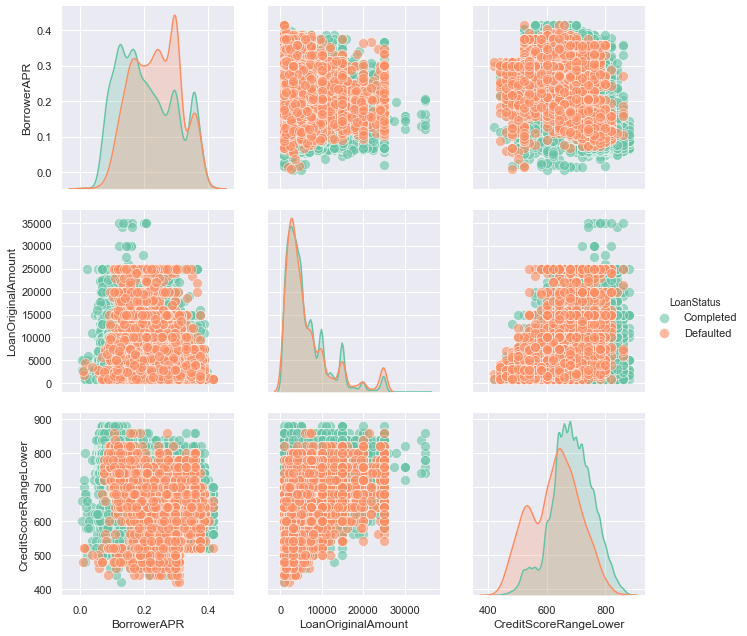

In [43]:
fig = plt.figure(figsize=(8,6))

sns.pairplot(loan_category,vars = ['BorrowerAPR', 'LoanOriginalAmount', 'CreditScoreRangeLower'],

             hue="LoanStatus", palette="Set2", plot_kws = {'alpha': 0.6, 's': 100 ,'edgecolor': 'white'}, height=3);

<Figure size 864x576 with 0 Axes>

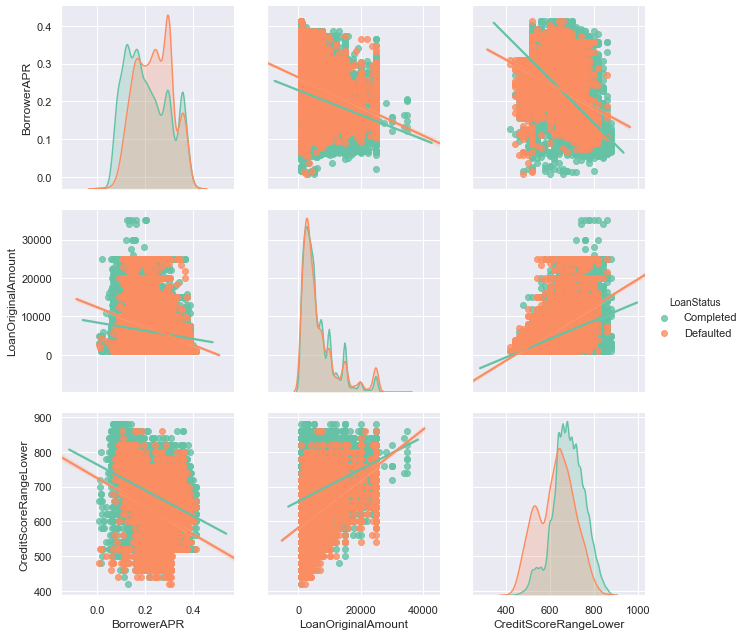

In [44]:
fig = plt.figure(figsize=(12,8))


sns.pairplot(loan_category,vars = ['BorrowerAPR', 'LoanOriginalAmount', 'CreditScoreRangeLower'], kind='reg',
                  hue="LoanStatus", palette="Set2", height=3);


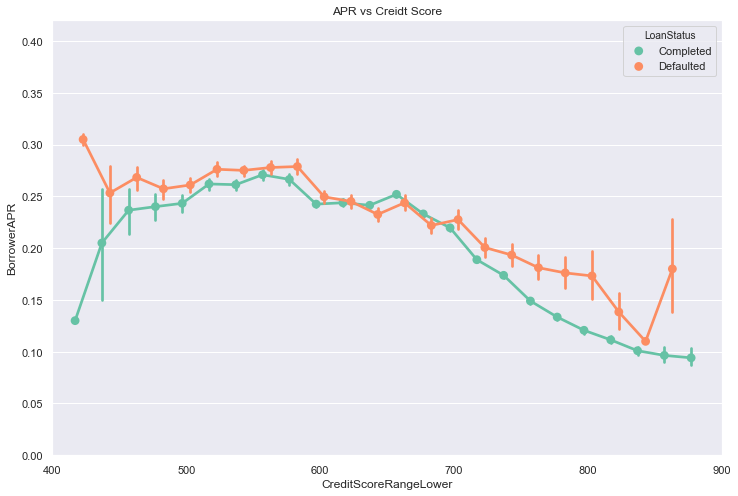

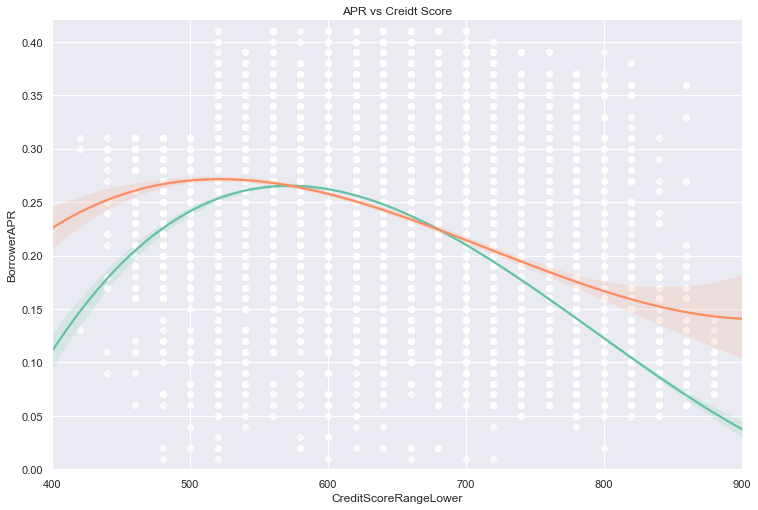

In [62]:
plt.figure(figsize = [12, 8])
sns.pointplot(data = loan_category, x = 'CreditScoreRangeLower', y = 'BorrowerAPR', hue = 'LoanStatus',
                  dodge = 0.3, palette="Set2")

plt.title('APR vs Creidt Score')
plt.xlim(-1,24)
plt.xticks(np.arange(-1,24+1,5),labels=['400','500','600','700','800','900'])
plt.ylim(0,.42)
sns.set_style('darkgrid')
sns.lmplot(x = 'CreditScoreRangeLower', y = 'BorrowerAPR', hue="LoanStatus", data=loan_category,palette="Set2",
          scatter_kws={'color':'white'}, legend=False, order=3,height=7, aspect=1.5)
plt.xlim(400,900)
plt.ylim(0,.42)
plt.title('APR vs Creidt Score');

''

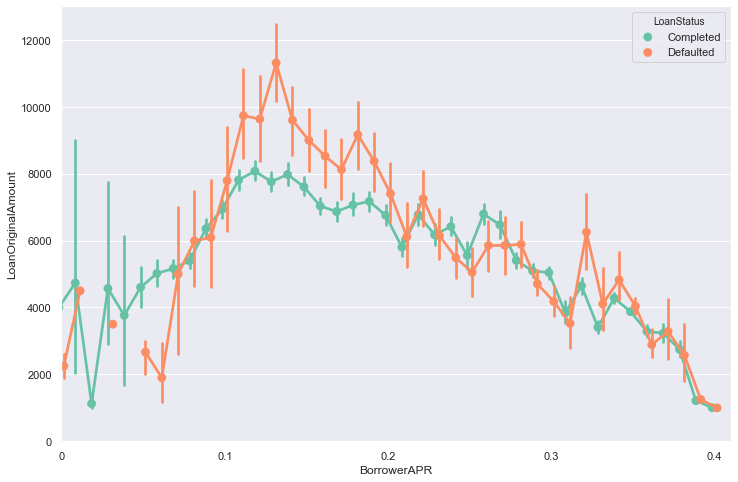

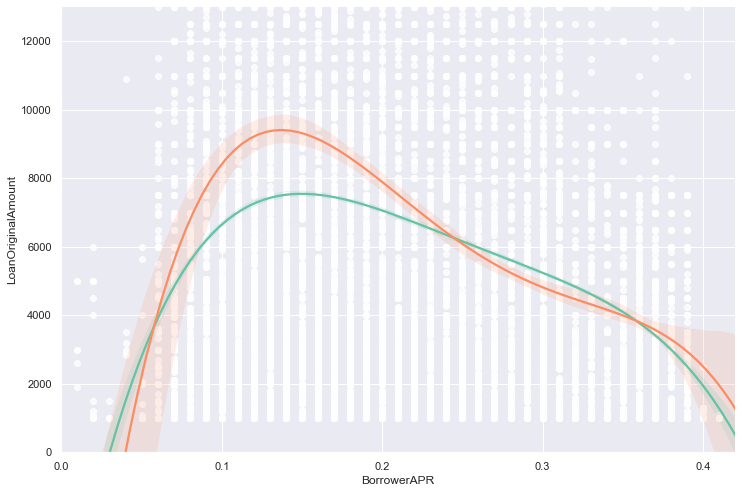

In [65]:
loan_apr = loan_category.copy()
loan_apr['BorrowerAPR'] = round(loan_apr['BorrowerAPR'],2)

plt.figure(figsize = [12, 8])
sns.pointplot(data = loan_apr, x = 'BorrowerAPR', y = 'LoanOriginalAmount', hue = 'LoanStatus',
                  dodge = 0.3, palette="Set2")
plt.ylim(0,13000)
plt.xlim(0,41)
plt.xticks([0,10,20,30,40], [0,0.1, .2, .3, 0.4]);

sns.lmplot(x = 'BorrowerAPR', y = 'LoanOriginalAmount', hue="LoanStatus", data=loan_category,palette="Set2",
           scatter_kws={'color':'white'},legend=False, order=4, height=7, aspect=1.5)
plt.ylim(0,13000)
plt.xlim(0,.42)
plt.xticks([0,0.1, .2, .3, 0.4]);
;


''

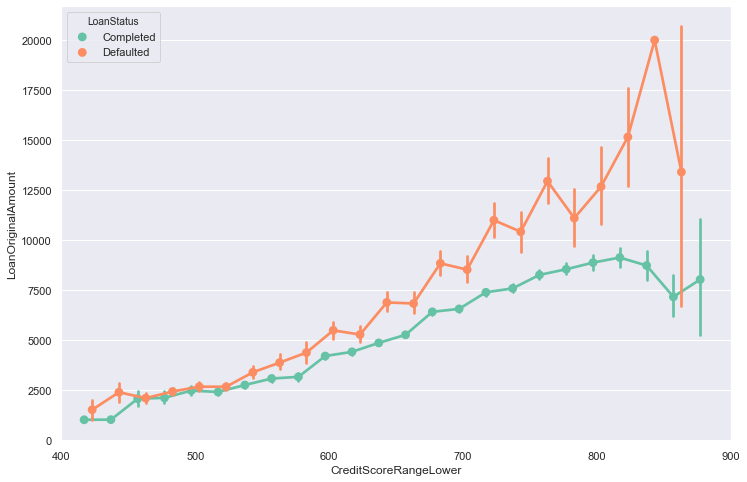

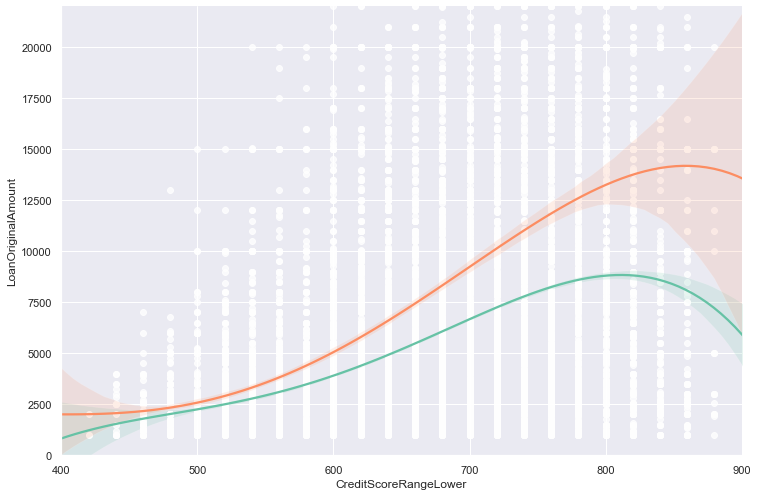

In [61]:

plt.figure(figsize = [12, 8])
sns.pointplot(data = loan_category, x = 'CreditScoreRangeLower', y = 'LoanOriginalAmount', hue = 'LoanStatus',
                  dodge = 0.3, palette="Set2")
plt.xlim(-1,24)
plt.xticks(np.arange(-1,24+1,5),labels=['400','500','600','700','800','900'])
;

sns.lmplot(x = 'CreditScoreRangeLower', y = 'LoanOriginalAmount', hue="LoanStatus", data=loan_category,palette="Set2",
          scatter_kws={'color':'white'}, legend=False, order=4,  height=7, aspect=1.5)
plt.xlim(400,900)
plt.ylim(0,22000)
plt.yticks(np.arange(0,22000,2500))
;